In [116]:
import numpy as np
import pickle as pkl
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

In [166]:
with open('/scratch/gurkirat.singh/training_logs/pointnetvlad/exp_26_oct/results/embeddings_train_10.pkl','rb') as f:
    results = pkl.load(f)

In [167]:
def prs(embeddings, positions, positive_range=4):
    assert embeddings.shape[0] == positions.shape[0]
    real_loop = []
    detected_loop = []
    for i in range(embeddings.shape[0]):
        for j in range(i):
            distance = np.linalg.norm(positions[i] - positions[j])
            if distance <= positive_range:
                real_loop.append(1)
            else:
                real_loop.append(0)
            detected_loop.append(-np.linalg.norm(embeddings[i] - embeddings[j]))
            
    display = PrecisionRecallDisplay.from_predictions(real_loop, detected_loop, name=" ")
    _ = display.ax_.set_title("recision-Recall curve")
    plt.show()
    return precision_recall_curve(real_loop, detected_loop)

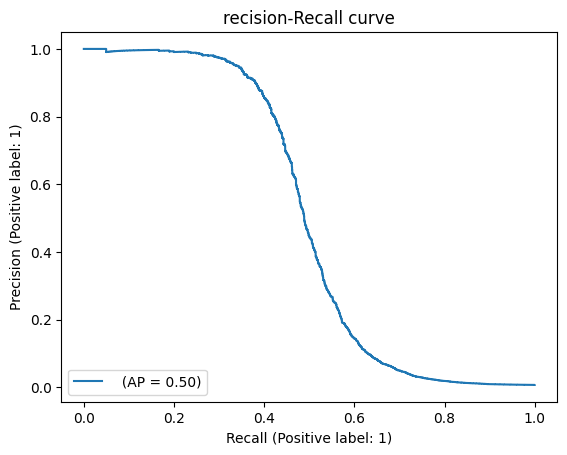

In [168]:
p, r, t = prs(results['embeddings'], results['positions'], 4)
# plt.plot(r,p)

In [52]:
f_score = 2 * p * r / (p + r)
print('max f score: ', f_score.max())
f_score.argmax()

max f score:  0.5547965547965548


305533

In [53]:
p[f_score.argmax()]

0.7731788079470199

In [54]:
p.mean()

0.029618374136615545

In [169]:
def recall_n(embeddings, positions, positive_range=4, max_n=30):
    max_n = max(int(len(positions) / 100), max_n)
    recalls = np.zeros((max_n,))
    cnt = 0
    for i in range(1,len(embeddings)):
        # print(i)
        poses_tree = KDTree(positions[:i])
        actual_indices = poses_tree.query_radius(positions[i].reshape(1,-1), r=positive_range)
        if len(actual_indices[0]) <= 0:
            continue
        cnt +=1
        embeddings_tree = KDTree(embeddings[:i])
        _, indices = embeddings_tree.query(embeddings[i].reshape(1,-1), k=min(max_n, i))
        none=True
        for rank, index in enumerate(indices[0]):
            pose_distance = np.linalg.norm(positions[i] - positions[index])
            # print(pose_distance)
            if pose_distance <= positive_range:
                # print(i, rank)
                none=False
                recalls[rank:] += 1
                break
                
    recalls /= cnt
    
    return recalls

In [173]:
embs = results['embeddings']
positions = results['positions']

In [170]:
recalls = recall_n(results['embeddings'], results['positions'], max_n=100)

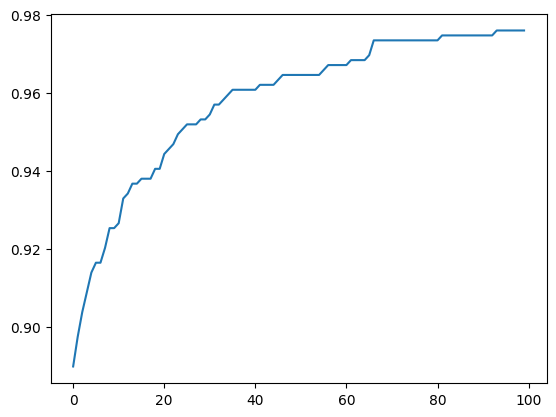

In [171]:
plt.plot(recalls)

In [175]:
recalls[7]

0.920253164556962

In [176]:
recalls[0]

0.889873417721519